In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
df.tail()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0
29450,Dealer,0,1,2,BHK,896.774194,1,1,"Jagatpura,Jaipur",26.832353,75.841749,27.8


In [6]:
df.sample(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
14245,Dealer,0,1,3,BHK,998.015311,1,1,"Sector 84 Faridabad,Faridabad",28.404730,77.367514,35.2
14198,Owner,0,0,2,BHK,1044.008995,1,1,"Nuvem,Goa",15.308890,73.946110,65.0
25207,Dealer,0,0,3,BHK,1464.843750,1,1,"Suraksha Nagar,Bangalore",20.098413,79.107860,75.0
11418,Owner,0,0,2,BHK,1050.175029,1,1,"Punkunnam,Thrissur",10.533900,76.208500,45.0
16358,Dealer,1,1,2,BHK,1102.083333,0,0,"Sholinganallur,Chennai",12.900150,80.227910,52.9
27931,Dealer,0,0,3,BHK,2059.997425,1,1,"Tilak Nagar,Jaipur",26.892300,75.816300,160.0
19650,Owner,0,0,1,BHK,419.140761,1,1,"Ranidanga,Siliguri",26.675324,88.363010,12.0
3323,Dealer,0,0,2,BHK,631.313131,1,1,"Kandivali (East),Maharashtra",19.195500,72.872800,110.0
15948,Dealer,0,0,3,BHK,1641.458553,1,1,"Sector-29 Noida,Noida",28.568966,77.335388,140.0
20887,Dealer,0,0,3,BHK,1910.299003,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,69.0


In [7]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [8]:
df.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


In [9]:
df.shape

(29451, 12)

In [10]:
df.columns.tolist()

['POSTED_BY',
 'UNDER_CONSTRUCTION',
 'RERA',
 'BHK_NO.',
 'BHK_OR_RK',
 'SQUARE_FT',
 'READY_TO_MOVE',
 'RESALE',
 'ADDRESS',
 'LONGITUDE',
 'LATITUDE',
 'TARGET(PRICE_IN_LACS)']

* posted by: gönderen
* under constructıon: yapım halinde olma durumu
* adress: adres
* resale:satış
* longıtude: boylam
* latıtude: enlem
* TARGET(PRICE_IN_LACS): hedefim

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [12]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [13]:
abs(df.corr()['TARGET(PRICE_IN_LACS)'].sort_values(ascending=False)) 

TARGET(PRICE_IN_LACS)    1.000000
SQUARE_FT                0.402685
BHK_NO.                  0.112283
RERA                     0.067636
UNDER_CONSTRUCTION       0.055399
LATITUDE                 0.017254
LONGITUDE                0.031112
READY_TO_MOVE            0.055399
RESALE                   0.207378
Name: TARGET(PRICE_IN_LACS), dtype: float64

<AxesSubplot:>

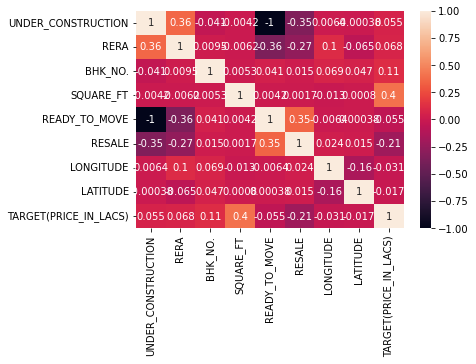

In [14]:
sns.heatmap(df.corr(), annot=True) 

<AxesSubplot:>

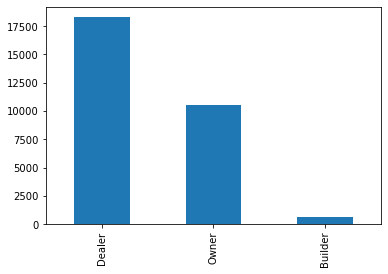

In [15]:
df.POSTED_BY.value_counts().plot.bar()

### Evlerin çoğunluğu satıcı-emlakçı tarafından satılmış, en az müteahhit tarafından satılmış

<AxesSubplot:>

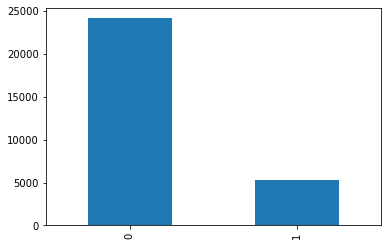

In [16]:
df.UNDER_CONSTRUCTION.value_counts().plot.bar()

### Evlerin çoğunluğu bitmiş halde, çok azı inşaat halinde.

In [17]:
df["UNDER_CONSTRUCTION"].describe()

count    29451.000000
mean         0.179756
std          0.383991
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: UNDER_CONSTRUCTION, dtype: float64

In [18]:
df["TARGET(PRICE_IN_LACS)"].value_counts()

110.0      795
100.0      770
120.0      652
130.0      598
45.0       583
          ... 
86.1         1
1550.0       1
28000.0      1
9910.0       1
18.3         1
Name: TARGET(PRICE_IN_LACS), Length: 1172, dtype: int64

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)'>

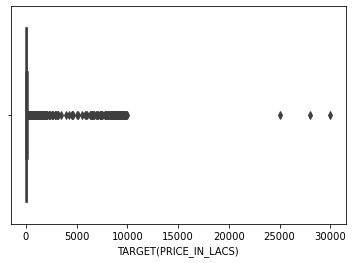

In [19]:
sns.boxplot(df["TARGET(PRICE_IN_LACS)"])

In [20]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [21]:
x=df.drop(["TARGET(PRICE_IN_LACS)"],axis=1)
y=df[["TARGET(PRICE_IN_LACS)"]] 


In [22]:
x=pd.get_dummies(x,drop_first=True)

In [23]:
x

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK,"ADDRESS_,Manoramaganj,Indore","ADDRESS_100 Feet Road,Anand","ADDRESS_101,yamuna Complex, Gokul Vihar Society,nh-8, Vapi,Vapi","ADDRESS_150 Feet Ring Road,Rajkot","ADDRESS_150 RING ROAD NEAR VRUNDAVAN RESTAURANT,Bhavnagar","ADDRESS_17th Main Road, Madipakkam,Chennai","ADDRESS_18june Road,Goa","ADDRESS_1A Block Koramangala,Bangalore","ADDRESS_1st Block HRBR Layout,Bangalore","ADDRESS_1st Block Jayanagar,Bangalore","ADDRESS_1st Block Koramangala,Bangalore","ADDRESS_1st Phase Chandanvan,Mathura","ADDRESS_1st Phase JP Nagar,Bangalore","ADDRESS_1st Stage Radha Krishna Layout,Bangalore","ADDRESS_2BHK,Aligarh","ADDRESS_2nd A Main Rd, Syndicate Bank Layout,Bangalore","ADDRESS_2nd Block Bel Layout,Bangalore","ADDRESS_2nd Block Hrbr Layout,Bangalore","ADDRESS_2nd Block Jayanagar,Bangalore","ADDRESS_2nd Phase JP Nagar,Bangalore","ADDRESS_2nd Phase Judicial Layout,Bangalore","ADDRESS_2nd Stage Arekere Mico Layout,Bangalore","ADDRESS_2nd Stage Nagarbhavi,Bangalore","ADDRESS_2nd Stage Vijaynagar,Mysore","ADDRESS_3rd Block Banashankari,Bangalore","ADDRESS_3rd Block Jayanagar,Bangalore","ADDRESS_3rd Phase JP Nagar,Bangalore","ADDRESS_3rd Stage Raja Rajeshwari Nagar,Bangalore","ADDRESS_3rd Stage Vijayanagar,Mysore","ADDRESS_4 Bunglows,Lalitpur","ADDRESS_4 Bunglows,Maharashtra","ADDRESS_4 Bunglows,Mumbai","ADDRESS_4th Block Jayanagar,Bangalore","ADDRESS_4th Block Koramangala,Bangalore","ADDRESS_4th Block Rajajinagar,Bangalore","ADDRESS_4th Phase JP Nagar,Bangalore","ADDRESS_4th T block Jayanagar,Bangalore","ADDRESS_528,Palwal,Palwal","ADDRESS_58 Prem Nagar Gwalior,Gwalior",...,"ADDRESS_ramzaanwadi,Vapi","ADDRESS_sada,Gwalior","ADDRESS_sadhana,Jamnagar","ADDRESS_sadhu vadvani road,Rajkot","ADDRESS_sadhuvasvani road,Rajkot","ADDRESS_saipem,Goa","ADDRESS_sanjay nagar,Raigad","ADDRESS_sarjapura main road,Bangalore","ADDRESS_sec 116 landran road,Chandigarh","ADDRESS_sector -10 rewari,Rewari","ADDRESS_sector 15 ulwe,Lalitpur","ADDRESS_sector 4, greater noida west,Noida","ADDRESS_sector 4,Karnal","ADDRESS_sector-121 Noida,Noida","ADDRESS_sector-58 Gurgaon,Gurgaon","ADDRESS_shanti nagar,Rajkot","ADDRESS_shingnapur,Kolhapur","ADDRESS_shiv colony,Palwal","ADDRESS_shivaji nagar dahivali,Karjat","ADDRESS_shiyapura,Vadodara","ADDRESS_shri nagar nx,Indore","ADDRESS_shri ram colony,Banswara","ADDRESS_shroff road,Rajkot","ADDRESS_sikka nagar,Mumbai","ADDRESS_silicon city,Indore","ADDRESS_sivaraopeta,Bhimavaram","ADDRESS_sudarshan nagar,Indore","ADDRESS_sulabh awas, gomti nagar,Lucknow","ADDRESS_sular road,Patiala","ADDRESS_swastik nagar,Indore","ADDRESS_tallaiya,Bhopal","ADDRESS_thakurli,Mumbai","ADDRESS_tilak nagar, chembur west,Lalitpur","ADDRESS_tirumullaivoyal,Chennai","ADDRESS_tope nagar,Amravati","ADDRESS_transport nagar,Kota","ADDRESS_ulchala road,Kurnool","ADDRESS_upper chelidanga,Asansol","ADDRESS_vasa vira society,Jamnagar","ADDRESS_vasantam nagar,Avadi,Chennai","ADDRESS_vasundhara nagar,Jalna","ADDRESS_veeraragavalu Nagar, Vinayagapuram, Kathirvedu Village, Ambattur Taluk,Chennai","ADDRESS_vidyut nagar,Rajkot","ADDRESS_vikas nagar,Karnal","ADDRESS_vinayaka,Varanasi","ADDRESS_virar,Palghar","ADDRESS_vishakoderu,Bhimavaram","ADDRESS_walkeshwari nagari,Jamnagar","ADDRESS_west mambalam,Chennai","ADDRESS_yelahanka/Jakkur,Bangalore"
0,0,0,2,1300.236407,1,1,12.969910,77.597960,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,

In [24]:
#regression_funct(x,y)    # veri çok olduğu için modelleri tek tek çalıştıramadım

# Pycaret ile başarı oranım

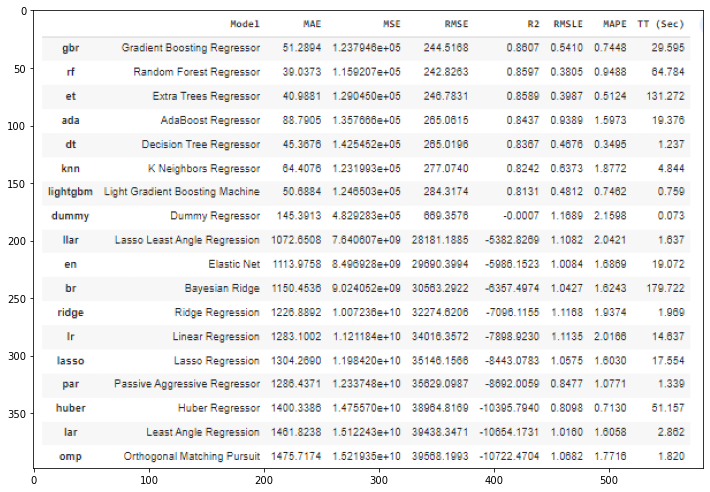

In [25]:
plt.figure(figsize=(12,12))
img=plt.imread('Ekran Alıntısı.PNG')
plt.imshow(img)
plt.show();

# en iyi sonucu Gradien Boosting Regressor ile buldum
* r2:80%